# Advanced Attention Visualization Techniques

In this notebook, we'll explore various techniques for visualizing attention mechanisms. We'll cover:

1. Heatmaps for different attention types
2. Attention flow visualization
3. Multi-head attention visualization
4. Comparative visualization of different attention mechanisms
5. Animated attention patterns
6. Word-to-word attention visualization
7. Attention over long sequences

In [3]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set random seed for reproducibility
torch.manual_seed(42)

## 1. Heatmaps for Different Attention Types


In [4]:

def generate_attention_weights(seq_length, num_heads, attention_type='full'):
    if attention_type == 'full':
        return torch.rand(num_heads, seq_length, seq_length)
    elif attention_type == 'local':
        weights = torch.zeros(num_heads, seq_length, seq_length)
        window_size = 3
        for i in range(seq_length):
            start = max(0, i - window_size // 2)
            end = min(seq_length, i + window_size // 2 + 1)
            weights[:, i, start:end] = torch.rand(num_heads, end - start)
        return weights
    elif attention_type == 'sparse':
        weights = torch.zeros(num_heads, seq_length, seq_length)
        weights[:, torch.arange(seq_length), torch.randint(0, seq_length, (seq_length,))] = 1
        return weights

In [5]:

def plot_attention_heatmap(weights, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(weights, cmap='YlOrRd')
    plt.title(title)
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

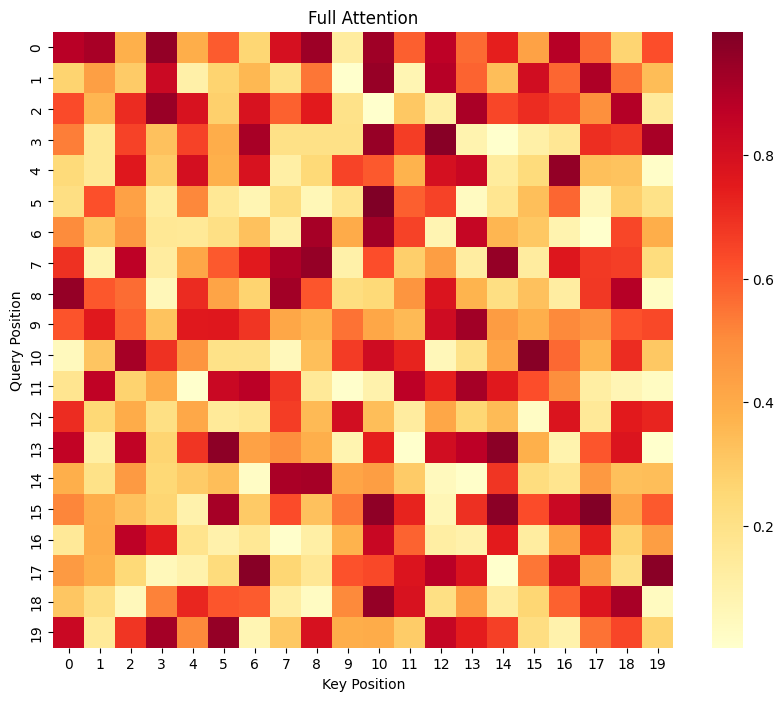

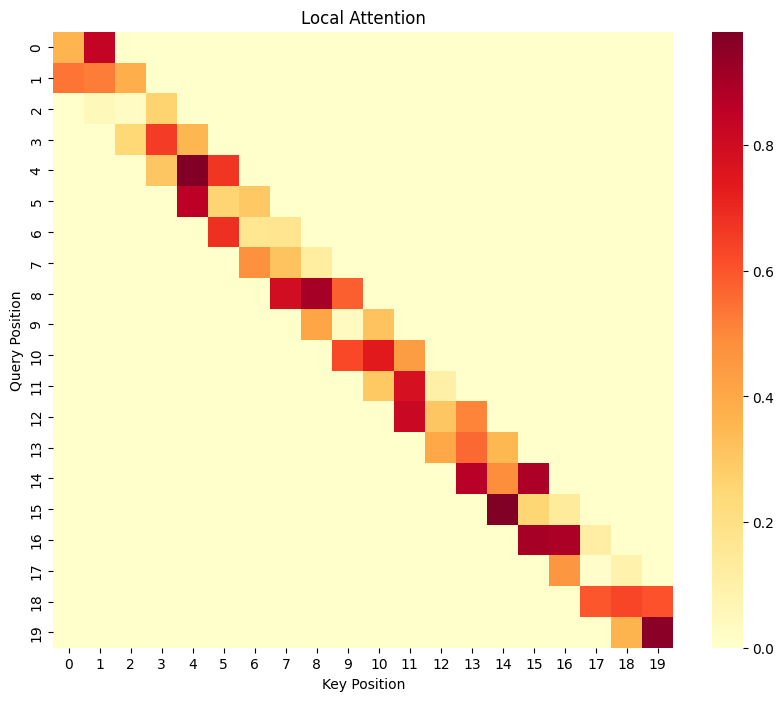

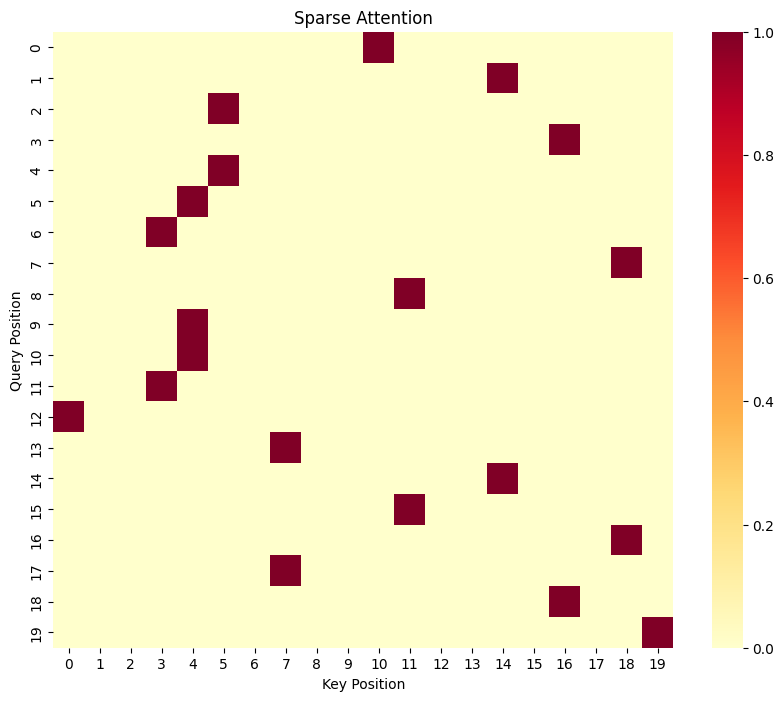

In [6]:

# Generate and plot attention weights for different types
seq_length, num_heads = 20, 1

for att_type in ['full', 'local', 'sparse']:
    weights = generate_attention_weights(seq_length, num_heads, att_type)
    plot_attention_heatmap(weights[0], f'{att_type.capitalize()} Attention')

## 2. Attention Flow Visualization


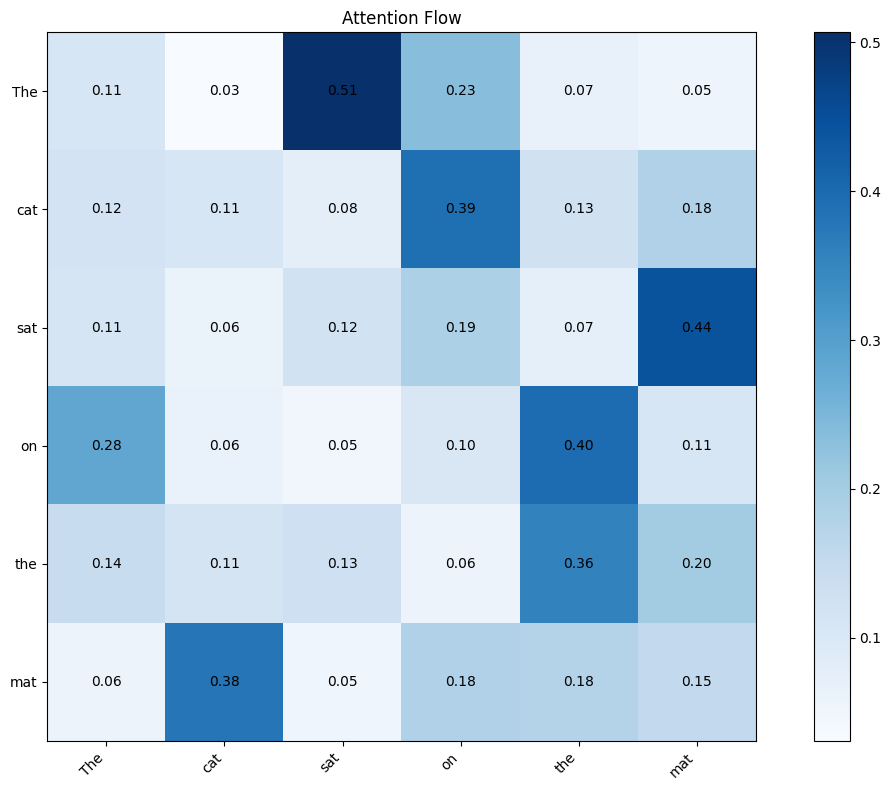

In [7]:
def plot_attention_flow(weights, words):
    plt.figure(figsize=(12, 8))
    plt.imshow(weights, cmap='Blues')
    plt.colorbar()
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.yticks(range(len(words)), words)
    plt.title('Attention Flow')
    for (j,i),label in np.ndenumerate(weights):
        plt.text(i,j,f'{label:.2f}',ha='center',va='center')
    plt.tight_layout()
    plt.show()

words = ['The', 'cat', 'sat', 'on', 'the', 'mat']
weights = torch.softmax(torch.randn(len(words), len(words)), dim=-1)
plot_attention_flow(weights.numpy(), words)

## 3. Multi-head Attention Visualization


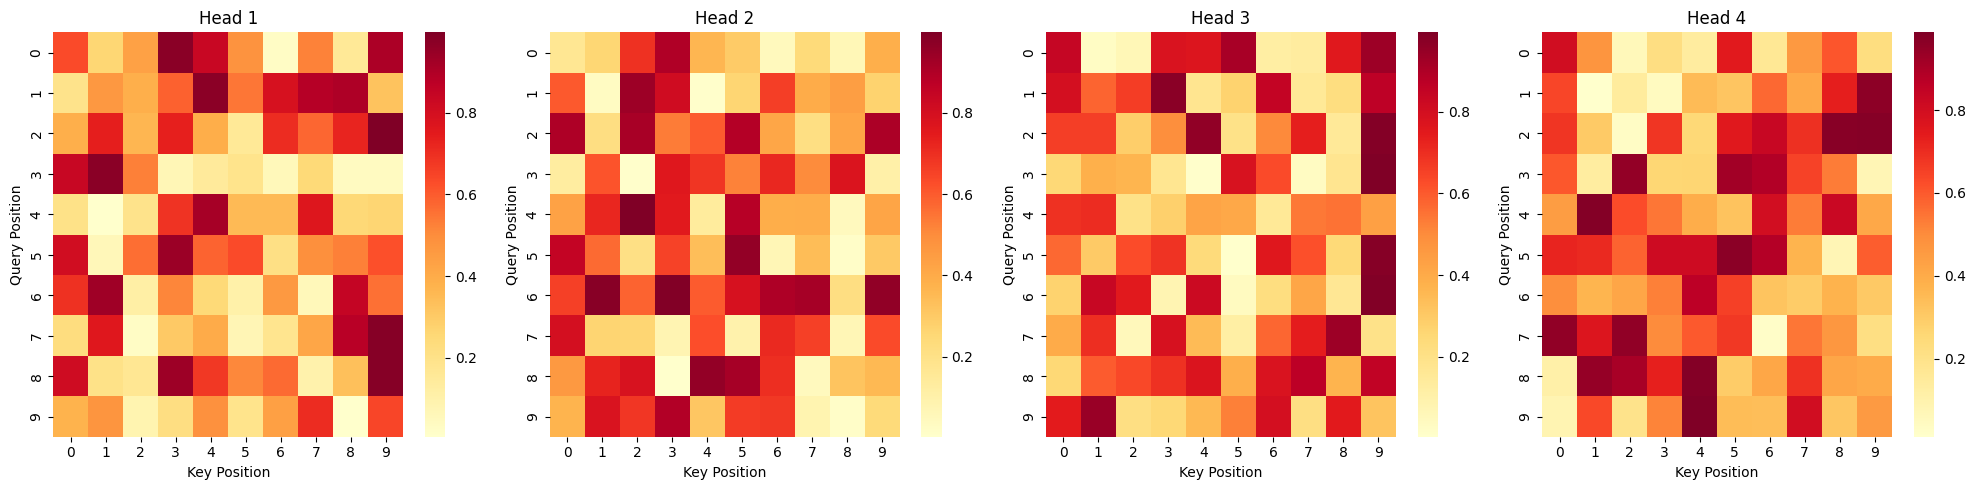

In [8]:

def plot_multihead_attention(weights, num_heads):
    fig, axes = plt.subplots(1, num_heads, figsize=(20, 5))
    for i, ax in enumerate(axes):
        sns.heatmap(weights[i], ax=ax, cmap='YlOrRd')
        ax.set_title(f'Head {i+1}')
        ax.set_xlabel('Key Position')
        ax.set_ylabel('Query Position')
    plt.tight_layout()
    plt.show()

seq_length, num_heads = 10, 4
weights = generate_attention_weights(seq_length, num_heads, 'full')
plot_multihead_attention(weights, num_heads)

## 4. Comparative Visualization of Different Attention Mechanisms


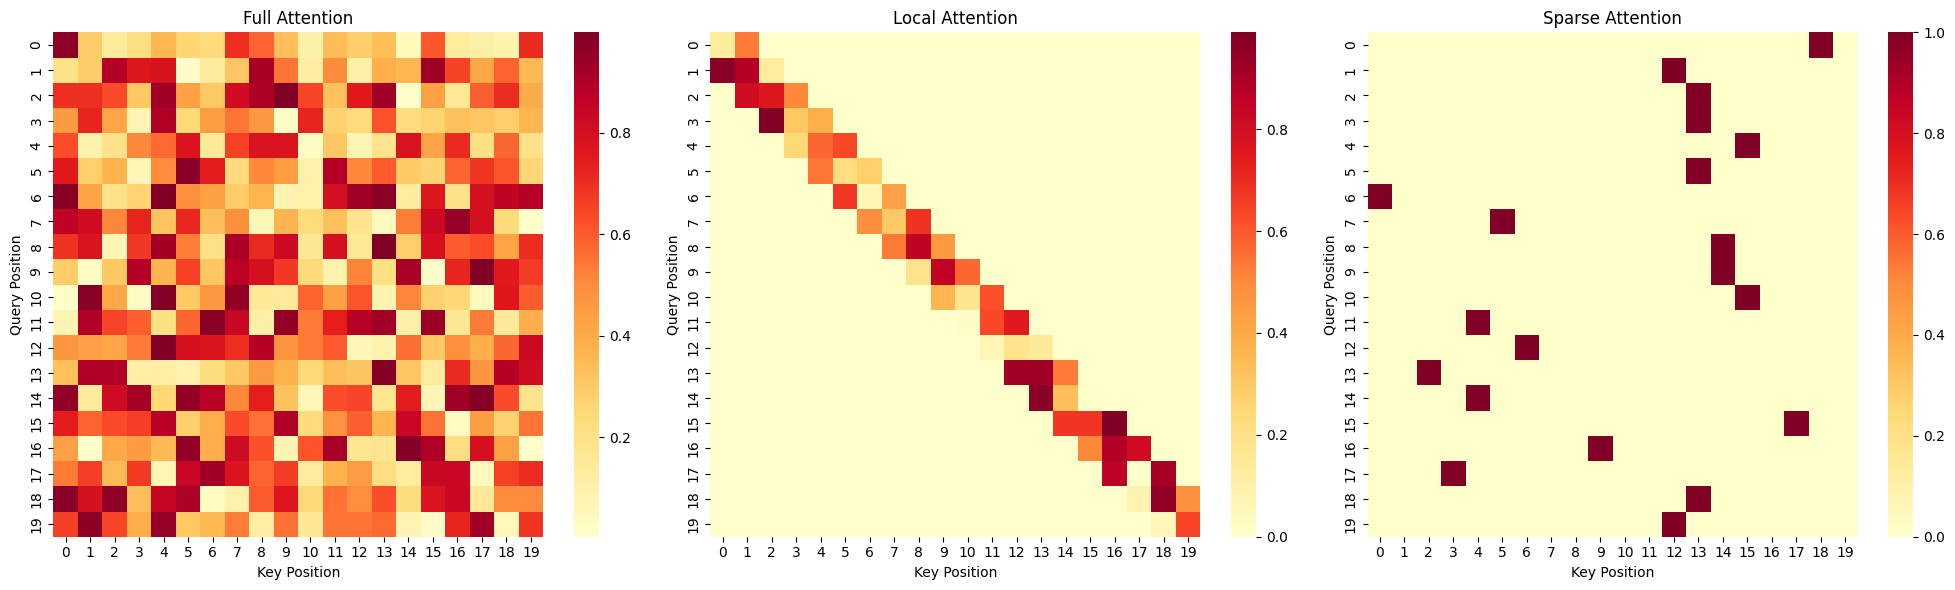

In [9]:
def plot_attention_comparison(seq_length, num_heads):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    titles = ['Full Attention', 'Local Attention', 'Sparse Attention']

    for i, att_type in enumerate(['full', 'local', 'sparse']):
        weights = generate_attention_weights(seq_length, num_heads, att_type)
        sns.heatmap(weights[0], ax=axes[i], cmap='YlOrRd')
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Key Position')
        axes[i].set_ylabel('Query Position')

    plt.tight_layout()
    plt.show()

seq_length, num_heads = 20, 1
plot_attention_comparison(seq_length, num_heads)

## 5. Animated Attention Patterns


In [10]:
def animate_attention(weights):
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(frame):
        ax.clear()
        sns.heatmap(weights[frame], ax=ax, cmap='YlOrRd', vmin=0, vmax=1)
        ax.set_title(f'Attention Head {frame + 1}')
        ax.set_xlabel('Key Position')
        ax.set_ylabel('Query Position')

    anim = FuncAnimation(fig, update, frames=weights.shape[0], interval=1000, repeat=True)
    plt.close(fig)
    return HTML(anim.to_jshtml())

seq_length, num_heads = 10, 4
weights = generate_attention_weights(seq_length, num_heads, 'full')
animate_attention(weights)

## 6. Word-to-word Attention Visualization


In [17]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate_attention(weights):
    fig, ax = plt.subplots(figsize=(8, 6))
    num_frames, seq_len, _ = weights.shape

    heatmap = ax.imshow(weights[0], cmap='YlOrRd', vmin=0, vmax=1)
    ax.set_title(f'Attention Head 1')
    ax.set_xlabel('Key Position')
    ax.set_ylabel('Query Position')

    def update(frame):
        heatmap.set_array(weights[frame])
        ax.set_title(f'Attention Head {frame + 1}')
        return [heatmap]

    anim = FuncAnimation(fig, update, frames=num_frames, interval=1000, blit=True)
    plt.close(fig)  # Prevent duplicate display in notebooks
    return HTML(anim.to_jshtml())

# Generate sample attention weights
seq_length, num_heads = 10, 4
weights = torch.softmax(torch.randn(num_heads, seq_length, seq_length), dim=-1)

# Display the animation
animate_attention(weights)



## 7. Attention over Long Sequences


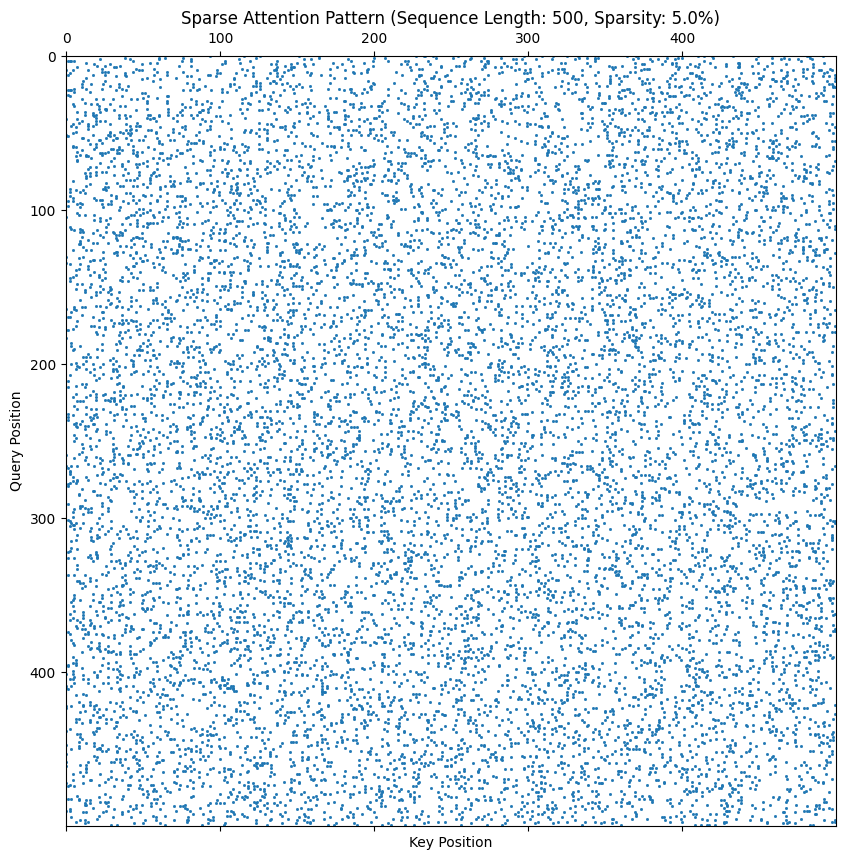

In [15]:
def plot_long_sequence_attention(seq_length, sparsity=0.1):
    weights = torch.zeros(seq_length, seq_length)
    num_connections = int(seq_length * sparsity)

    for i in range(seq_length):
        indices = torch.randperm(seq_length)[:num_connections]
        weights[i, indices] = 1  # Set to 1 instead of random values

    plt.figure(figsize=(12, 10))
    plt.spy(weights, markersize=1)
    plt.title(f'Sparse Attention Pattern (Sequence Length: {seq_length}, Sparsity: {sparsity:.1%})')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

plot_long_sequence_attention(500, sparsity=0.05)



## Conclusion
 
In this notebook, we've explored various techniques for visualizing attention mechanisms:

1. Heatmaps for different attention types (full, local, sparse)
2. Attention flow visualization
3. Multi-head attention visualization
4. Comparative visualization of different attention mechanisms
5. Animated attention patterns
6. Word-to-word attention visualization
7. Attention over long sequences
 
These visualizations provide insights into how different attention mechanisms work and how they distribute focus across sequences. They can be particularly useful for understanding the behavior of attention in different contexts and for different tasks.
 
Remember that while these visualizations use randomly generated weights for demonstration purposes, in real-world scenarios, you would use actual attention weights from trained models. This would allow you to analyze how your model is attending to different parts of the input for specific tasks or examples.